Data Analytics III
1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall
on the given dataset.

In [8]:
import pandas as pd
import numpy as np
df= pd.read_csv("/home/admin1/IRIS.csv")
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


(150, 5)

In [20]:
X = df.drop(['species'], axis=1)
y = df.drop(['sepal_length',  'sepal_width',  'petal_length',  'petal_width'], axis=1)
print(X.shape)
print(y.shape)

(150, 4)
(150, 1)


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 1)
(30, 1)


In [21]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

/home/admin1/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [22]:
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.9333333333333333

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print(accuracy_score(y_test, y_pred))

0.9333333333333333


In [24]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
print("Confusion matrix:")
print(cm)

Confusion matrix:
[[ 6  0  0]
 [ 0 13  1]
 [ 0  1  9]]


In [26]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
print("Confusion matrix:")
print(cm)

Confusion matrix:
[[ 6  0  0]
 [ 0 13  1]
 [ 0  1  9]]


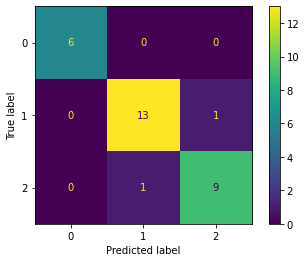

In [27]:
disp.plot()
plt.show()

In [28]:
def get_confusion_matrix_values(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return(cm[0][0], cm[0][1], cm[1][0], cm[1][1])

TP, FP, FN, TN = get_confusion_matrix_values(y_test, y_pred)
print("TP: ", TP)
print("FP: ", FP)
print("FN: ", FN)
print("TN: ", TN)

TP:  6
FP:  0
FN:  0
TN:  13


In [41]:
from sklearn.metrics import (precision_score, f1_score, recall_score)
print("The Accuracy is ", accuracy_score(y_test, y_pred))
print("The precision is ", precision_score(y_test, y_pred, average=None))
print("The recall is ", recall_score(y_test, y_pred, average=None) )

The Accuracy is  0.9333333333333333
The precision is  [1.         0.92857143 0.9       ]
The recall is  [1.         0.92857143 0.9       ]
